# Importing required libraries:

In [258]:
import pandas as pd

import os

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
#To keep the visualizations i.e. the output of plotting commands inline within the frontend

import warnings
warnings.filterwarnings('ignore')
#To ignore warnings

import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode()
#Set notebook mode to work in offline

# Reading the data:

In [259]:
MoviesDF = pd.read_excel("movies.xlsx")
#Importing the file into a Pandas dataframe object

In [260]:
MoviesDF.head()

name rating      genre  year                           released  \
0   12 Rounds  PG-13     Action  2009     March 27, 2009 (United States)   
1   127 Hours      R  Adventure  2010   January 28, 2011 (United States)   
2    17 Again  PG-13     Comedy  2009     April 17, 2009 (United States)   
3        2012  PG-13     Action  2009  November 13, 2009 (United States)   
4  27 Dresses  PG-13     Comedy  2008   January 18, 2008 (United States)   

   score   votes         director               writer             star  \
0    5.6   28000     Renny Harlin         Daniel Kunka        John Cena   
1    7.5  356000      Danny Boyle          Danny Boyle     James Franco   
2    6.4  187000      Burr Steers        Jason Filardi        Zac Efron   
3    5.8  360000  Roland Emmerich      Roland Emmerich      John Cusack   
4    6.1  157000    Anne Fletcher  Aline Brosh McKenna  Katherine Heigl   

         country        gross  runtime  rotten_Tomatoes_Ratings  \
0  United States   17280326.0    108.0                     30.0   
1  United States   60738797.0     94.0                     93.0   
2  United States  136316880.0    102.0                     55.0   
3  United States  791217826.0    158.0                     39.0   
4  United States  162655351.0    111.0                     40.0   

   Audience_Ratings  Budget_million                   company  
0              52.0            20.0                Fox Atomic  
1              84.0            18.0  Fox Searchlight Pictures  
2              70.0            20.0           New Line Cinema  
3              63.0           200.0         Columbia Pictures  
4              71.0            30.0         Fox 2000 Pictures

# Data Cleaning:

In [261]:
#Removing unnecessary columns

In [262]:
MoviesDF.drop(['released', 'votes', 'director', 'writer', 'star','country', 'company'], axis=1, inplace = True)

In [263]:
MoviesDF.head()

name rating      genre  year  score        gross  runtime  \
0   12 Rounds  PG-13     Action  2009    5.6   17280326.0    108.0   
1   127 Hours      R  Adventure  2010    7.5   60738797.0     94.0   
2    17 Again  PG-13     Comedy  2009    6.4  136316880.0    102.0   
3        2012  PG-13     Action  2009    5.8  791217826.0    158.0   
4  27 Dresses  PG-13     Comedy  2008    6.1  162655351.0    111.0   

   rotten_Tomatoes_Ratings  Audience_Ratings  Budget_million  
0                     30.0              52.0            20.0  
1                     93.0              84.0            18.0  
2                     55.0              70.0            20.0  
3                     39.0              63.0           200.0  
4                     40.0              71.0            30.0

In [264]:
#Renaming columns

In [265]:
MoviesDF.columns = ['Film','ContentRating', 'Genre', 'Year', 'ReceptionScore', 'GrossProfit', 'Runtime',
                    'CriticRating', 'AudienceRating', 'BudgetInMillions']

In [266]:
MoviesDF.head()

Film ContentRating      Genre  Year  ReceptionScore  GrossProfit  \
0   12 Rounds         PG-13     Action  2009             5.6   17280326.0   
1   127 Hours             R  Adventure  2010             7.5   60738797.0   
2    17 Again         PG-13     Comedy  2009             6.4  136316880.0   
3        2012         PG-13     Action  2009             5.8  791217826.0   
4  27 Dresses         PG-13     Comedy  2008             6.1  162655351.0   

   Runtime  CriticRating  AudienceRating  BudgetInMillions  
0    108.0          30.0            52.0              20.0  
1     94.0          93.0            84.0              18.0  
2    102.0          55.0            70.0              20.0  
3    158.0          39.0            63.0             200.0  
4    111.0          40.0            71.0              30.0

In [267]:
#Changing the values in GrossProfit to Millions for consistency with BudgetInMillions.

In [268]:
MoviesDF['GrossProfit'] = MoviesDF['GrossProfit']/1000000

In [269]:
MoviesDF.head()

Film ContentRating      Genre  Year  ReceptionScore  GrossProfit  \
0   12 Rounds         PG-13     Action  2009             5.6    17.280326   
1   127 Hours             R  Adventure  2010             7.5    60.738797   
2    17 Again         PG-13     Comedy  2009             6.4   136.316880   
3        2012         PG-13     Action  2009             5.8   791.217826   
4  27 Dresses         PG-13     Comedy  2008             6.1   162.655351   

   Runtime  CriticRating  AudienceRating  BudgetInMillions  
0    108.0          30.0            52.0              20.0  
1     94.0          93.0            84.0              18.0  
2    102.0          55.0            70.0              20.0  
3    158.0          39.0            63.0             200.0  
4    111.0          40.0            71.0              30.0

In [270]:
#Rounding off the GrossProfit value to one decimal place.

In [271]:
MoviesDF = MoviesDF.round({'GrossProfit' : 1})           #inplace cannot be used with round() function. 

#With a dict, the number of places for specific columns can be specified with the column names as key 
#and the number of decimal places as value

In [272]:
MoviesDF.head()

Film ContentRating      Genre  Year  ReceptionScore  GrossProfit  \
0   12 Rounds         PG-13     Action  2009             5.6         17.3   
1   127 Hours             R  Adventure  2010             7.5         60.7   
2    17 Again         PG-13     Comedy  2009             6.4        136.3   
3        2012         PG-13     Action  2009             5.8        791.2   
4  27 Dresses         PG-13     Comedy  2008             6.1        162.7   

   Runtime  CriticRating  AudienceRating  BudgetInMillions  
0    108.0          30.0            52.0              20.0  
1     94.0          93.0            84.0              18.0  
2    102.0          55.0            70.0              20.0  
3    158.0          39.0            63.0             200.0  
4    111.0          40.0            71.0              30.0

In [273]:
#Renaming the GrossProfit column to GrossProfitInMillions :

In [274]:
MoviesDF.rename(columns = {'GrossProfit' : 'GrossProfitInMillions'}, inplace = True)

In [275]:
MoviesDF.head()

Film ContentRating      Genre  Year  ReceptionScore  \
0   12 Rounds         PG-13     Action  2009             5.6   
1   127 Hours             R  Adventure  2010             7.5   
2    17 Again         PG-13     Comedy  2009             6.4   
3        2012         PG-13     Action  2009             5.8   
4  27 Dresses         PG-13     Comedy  2008             6.1   

   GrossProfitInMillions  Runtime  CriticRating  AudienceRating  \
0                   17.3    108.0          30.0            52.0   
1                   60.7     94.0          93.0            84.0   
2                  136.3    102.0          55.0            70.0   
3                  791.2    158.0          39.0            63.0   
4                  162.7    111.0          40.0            71.0   

   BudgetInMillions  
0              20.0  
1              18.0  
2              20.0  
3             200.0  
4              30.0

In [276]:
#Adding a new columns for ROI (GrossProfitInMillions/BudgetInMillions):

In [277]:
MoviesDF['ROI'] = MoviesDF['GrossProfitInMillions']/MoviesDF['BudgetInMillions']

In [278]:
MoviesDF.head()

Film ContentRating      Genre  Year  ReceptionScore  \
0   12 Rounds         PG-13     Action  2009             5.6   
1   127 Hours             R  Adventure  2010             7.5   
2    17 Again         PG-13     Comedy  2009             6.4   
3        2012         PG-13     Action  2009             5.8   
4  27 Dresses         PG-13     Comedy  2008             6.1   

   GrossProfitInMillions  Runtime  CriticRating  AudienceRating  \
0                   17.3    108.0          30.0            52.0   
1                   60.7     94.0          93.0            84.0   
2                  136.3    102.0          55.0            70.0   
3                  791.2    158.0          39.0            63.0   
4                  162.7    111.0          40.0            71.0   

   BudgetInMillions       ROI  
0              20.0  0.865000  
1              18.0  3.372222  
2              20.0  6.815000  
3             200.0  3.956000  
4              30.0  5.423333

In [279]:
#Rearranging the columns

In [280]:
arrangement = list(MoviesDF.columns)

In [281]:
print(arrangement)

['Film', 'ContentRating', 'Genre', 'Year', 'ReceptionScore', 'GrossProfitInMillions', 'Runtime', 'CriticRating', 'AudienceRating', 'BudgetInMillions', 'ROI']


In [282]:
MoviesDF = MoviesDF[arrangement[0:4] + [arrangement[-2]] + [arrangement[5]] + [arrangement[-1]] + [arrangement[4]] + 
                                        arrangement[7:9] + [arrangement[6]]]

In [283]:
MoviesDF.head()

Film ContentRating      Genre  Year  BudgetInMillions  \
0   12 Rounds         PG-13     Action  2009              20.0   
1   127 Hours             R  Adventure  2010              18.0   
2    17 Again         PG-13     Comedy  2009              20.0   
3        2012         PG-13     Action  2009             200.0   
4  27 Dresses         PG-13     Comedy  2008              30.0   

   GrossProfitInMillions       ROI  ReceptionScore  CriticRating  \
0                   17.3  0.865000             5.6          30.0   
1                   60.7  3.372222             7.5          93.0   
2                  136.3  6.815000             6.4          55.0   
3                  791.2  3.956000             5.8          39.0   
4                  162.7  5.423333             6.1          40.0   

   AudienceRating  Runtime  
0            52.0    108.0  
1            84.0     94.0  
2            70.0    102.0  
3            63.0    158.0  
4            71.0    111.0

In [284]:
#Dropping null values

In [285]:
MoviesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Film                   474 non-null    object 
 1   ContentRating          474 non-null    object 
 2   Genre                  474 non-null    object 
 3   Year                   474 non-null    int64  
 4   BudgetInMillions       468 non-null    float64
 5   GrossProfitInMillions  473 non-null    float64
 6   ROI                    467 non-null    float64
 7   ReceptionScore         474 non-null    float64
 8   CriticRating           471 non-null    float64
 9   AudienceRating         472 non-null    float64
 10  Runtime                473 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 40.9+ KB


In [286]:
MoviesDF.dropna(inplace = True) 
#Dropping all records with null values

In [287]:
MoviesDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 0 to 473
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Film                   464 non-null    object 
 1   ContentRating          464 non-null    object 
 2   Genre                  464 non-null    object 
 3   Year                   464 non-null    int64  
 4   BudgetInMillions       464 non-null    float64
 5   GrossProfitInMillions  464 non-null    float64
 6   ROI                    464 non-null    float64
 7   ReceptionScore         464 non-null    float64
 8   CriticRating           464 non-null    float64
 9   AudienceRating         464 non-null    float64
 10  Runtime                464 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 43.5+ KB


In [288]:
#Changing the non-categorical values to categorical values where required

In [289]:
MoviesDF.describe()

Year  BudgetInMillions  GrossProfitInMillions         ROI  \
count   464.000000        464.000000             464.000000  464.000000   
mean   2009.125000         53.002155             156.111853    3.754457   
std       1.374521         50.048724             220.035823    9.524801   
min    2007.000000          1.000000               0.400000    0.057143   
25%    2008.000000         20.000000              41.300000    1.524572   
50%    2009.000000         35.000000              87.150000    2.548750   
75%    2010.000000         69.250000             178.825000    3.899000   
max    2011.000000        300.000000            2847.200000  193.400000   

       ReceptionScore  CriticRating  AudienceRating     Runtime  
count      464.000000    464.000000      464.000000  464.000000  
mean         6.326293     48.711207       60.099138  108.163793  
std          0.943638     26.418925       16.364071   16.717288  
min          1.900000      2.000000       19.000000   75.000000  
25%          5.800000     26.000000       48.000000   97.000000  
50%          6.400000     47.000000       60.000000  106.000000  
75%          7.000000     72.000000       72.000000  115.000000  
max          9.000000     97.000000       96.000000  191.000000

In [290]:
MoviesDF.ContentRating = MoviesDF.ContentRating.astype('category')
MoviesDF.Genre = MoviesDF.Genre.astype('category')
MoviesDF.Year = MoviesDF.Year.astype('category')
#Changing the above columns to categorical values.

In [291]:
MoviesDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 0 to 473
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Film                   464 non-null    object  
 1   ContentRating          464 non-null    category
 2   Genre                  464 non-null    category
 3   Year                   464 non-null    category
 4   BudgetInMillions       464 non-null    float64 
 5   GrossProfitInMillions  464 non-null    float64 
 6   ROI                    464 non-null    float64 
 7   ReceptionScore         464 non-null    float64 
 8   CriticRating           464 non-null    float64 
 9   AudienceRating         464 non-null    float64 
 10  Runtime                464 non-null    float64 
dtypes: category(3), float64(7), object(1)
memory usage: 34.7+ KB


In [297]:
#To see the unique values of each category:

In [293]:
MoviesDF.ContentRating.cat.categories

Index(['G', 'NC-17', 'PG', 'PG-13', 'R'], dtype='object')

In [294]:
MoviesDF.ContentRating.cat.categories

Index(['G', 'NC-17', 'PG', 'PG-13', 'R'], dtype='object')

In [295]:
MoviesDF.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [296]:
MoviesDF.Year.cat.categories

Int64Index([2007, 2008, 2009, 2010, 2011], dtype='int64')

---

# Insights through Visualizations: 

## Reception Distribution :-

In [298]:
#To make the plotting area bigger:
plt.rcParams['figure.figsize'] = 12,6

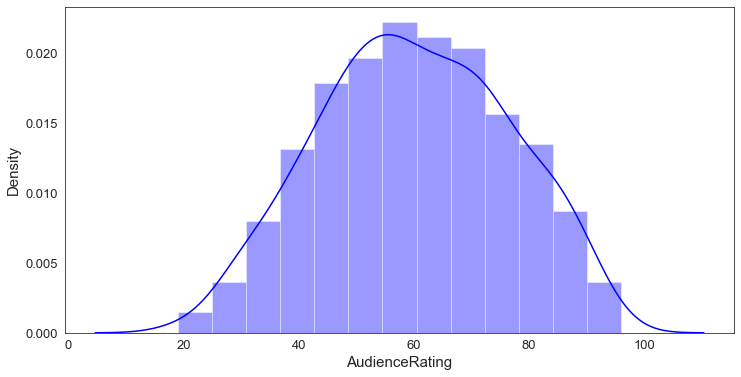

In [299]:
sns.set_style("white")                    #Set the aesthetic style of the plot.                    

AudienceRatingChart = sns.distplot(MoviesDF.AudienceRating, color = 'Blue')

#Specifying the sizes of the axis labels
axes = plt.gca()
axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15)

#Specifying the sizes of the axis values
plt.xticks(fontsize = 13)               
plt.yticks(fontsize = 13)

plt.show()

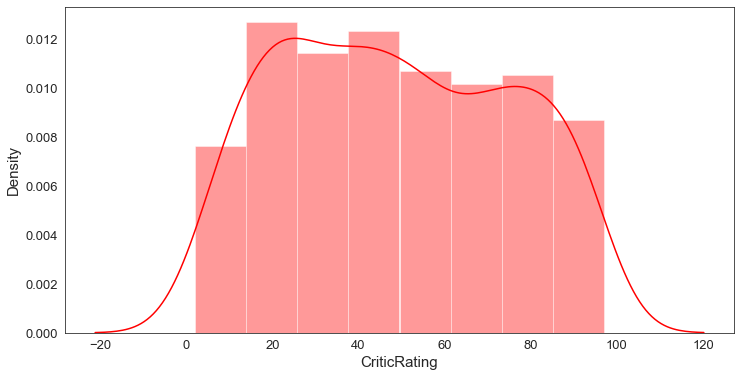

In [300]:
sns.set_style("white")                      

CriticRatingChart = sns.distplot(MoviesDF.CriticRating, color = 'Red')

#Specifying the sizes of the axis labels
axes = plt.gca()
axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15)

#Specifying the sizes of the axis values
plt.xticks(fontsize = 13)               
plt.yticks(fontsize = 13)

plt.show()

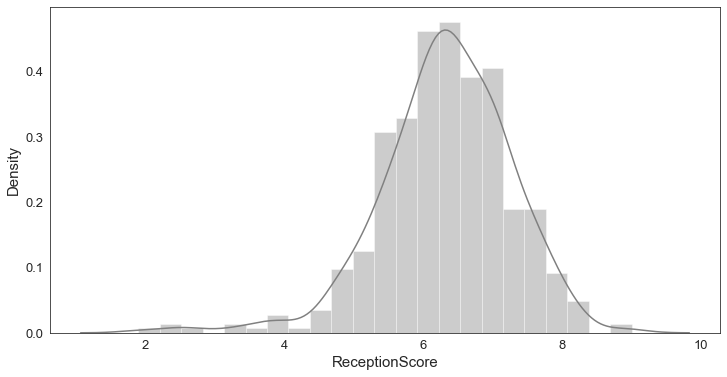

In [301]:
sns.set_style("white")                      

ReceptionScoreChart = sns.distplot(MoviesDF.ReceptionScore, color = 'Grey')

#Specifying the sizes of the axis labels
axes = plt.gca()
axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15)

#Specifying the sizes of the axis values
plt.xticks(fontsize = 13)               
plt.yticks(fontsize = 13)

plt.show()

In [800]:
#KDE Plot

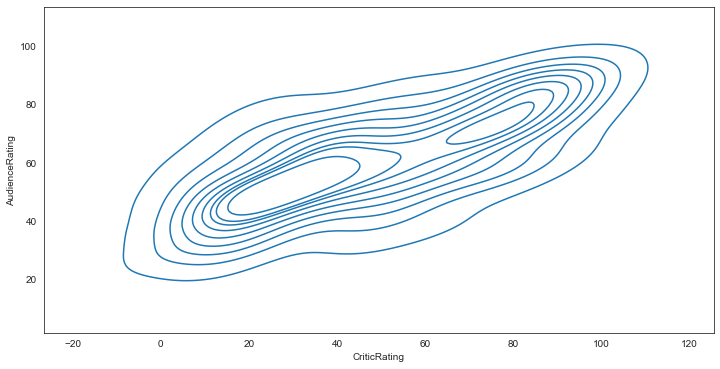

In [302]:
sns.set_style("white")                      

CriticAudienceRatingsKDEPlot = sns.kdeplot(MoviesDF.CriticRating, MoviesDF.AudienceRating)

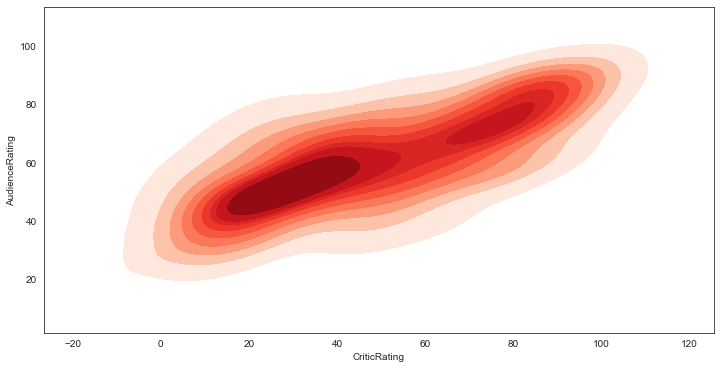

In [303]:
sns.set_style("white")                      

CriticAudienceRatingsKDEPlot = sns.kdeplot(MoviesDF.CriticRating, MoviesDF.AudienceRating, shade = True, cmap = 'Reds')
#Assing a colour (Red) to the plot.

In [304]:
#The KDE Plot is distorted on the edges; to overcome this: create an outline of the map above and map the outline on it.

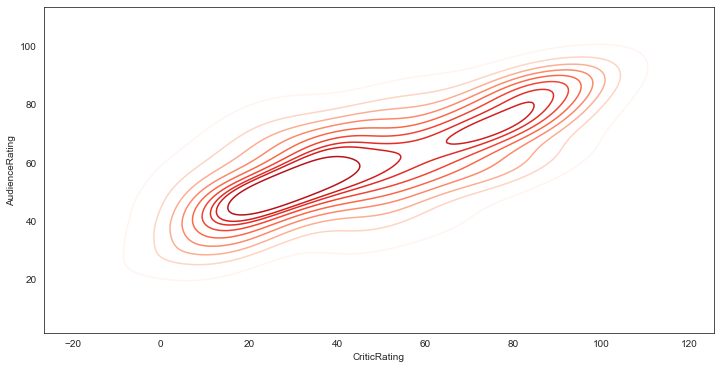

In [305]:
sns.set_style("white")                      

CriticAudienceRatingsKDEPlotOutline = sns.kdeplot(MoviesDF.CriticRating, MoviesDF.AudienceRating, cmap = 'Reds')

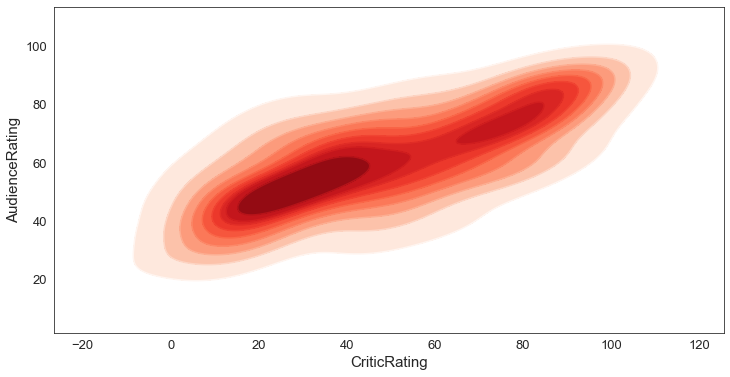

In [306]:
sns.set_style("white")                      

CriticAudienceRatingsKDEPlot = sns.kdeplot(MoviesDF.CriticRating, MoviesDF.AudienceRating, shade = True, cmap = 'Reds')
CriticAudienceRatingsKDEPlotOutline = sns.kdeplot(MoviesDF.CriticRating, MoviesDF.AudienceRating, cmap = 'Reds')

#Specifying the sizes of the axis labels
axes = plt.gca()
axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15)

#Specifying the sizes of the axis values
plt.xticks(fontsize = 13)               
plt.yticks(fontsize = 13)

plt.show()

## Dashboard (Putting it all together)

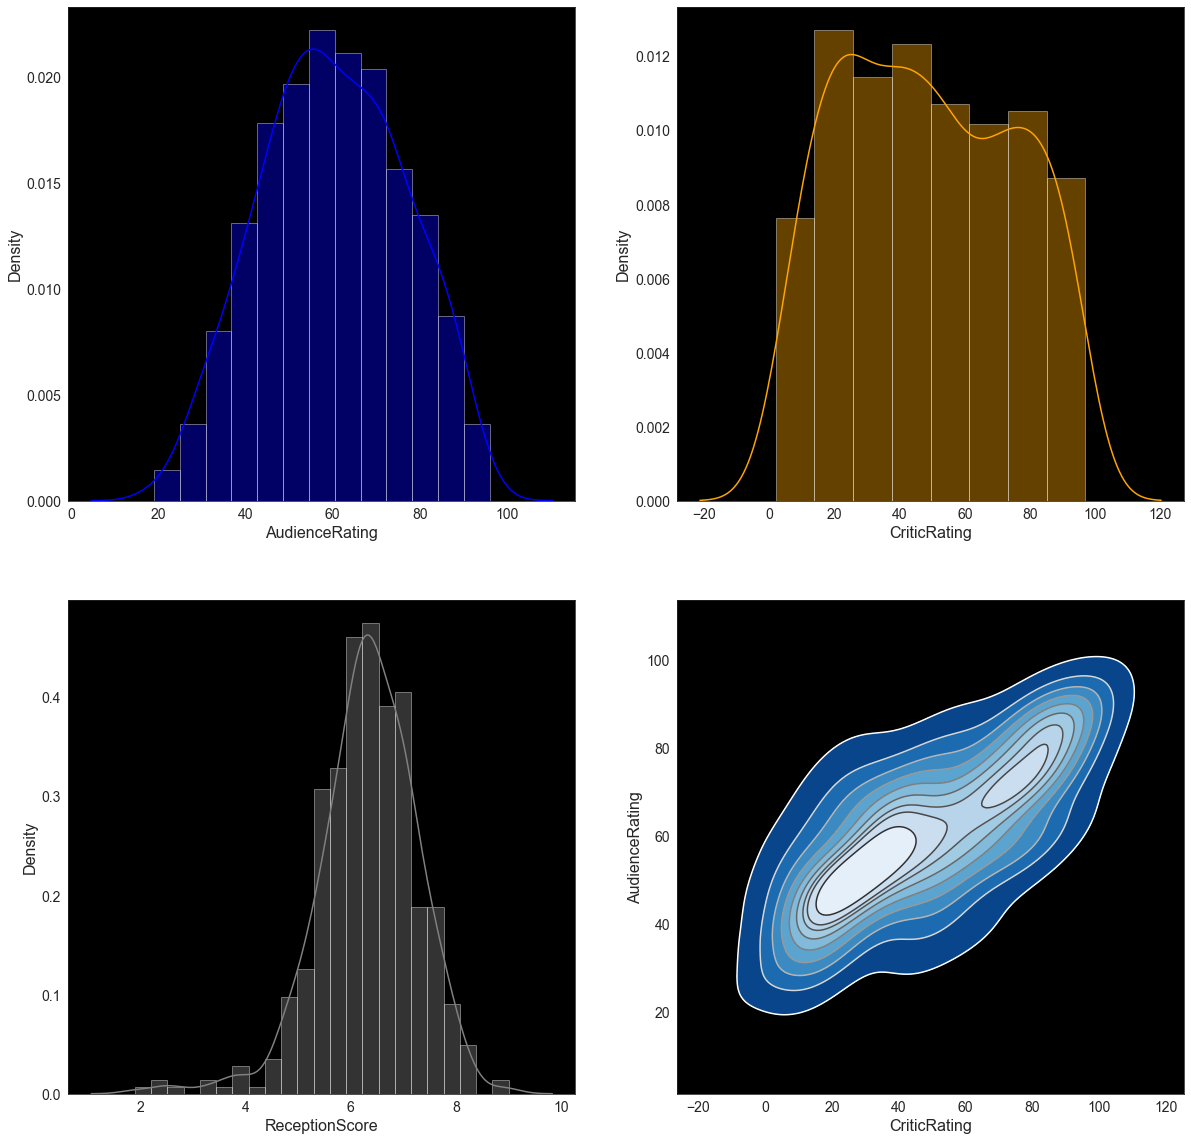

In [307]:
sns.set_style("white", {"axes.facecolor": "Black"})           #changing the bg to black
f, axis = plt.subplots(2, 2, figsize = (20, 20))              #Creating a 2x2 plot with 4 sub-plots

#Plot [0,0]
AudienceRatingChart = sns.distplot(MoviesDF.AudienceRating, color = 'Blue', ax = axis[0][0])
axis[0][0].xaxis.get_label().set_fontsize(16)
axis[0][0].yaxis.get_label().set_fontsize(16)

axis[0][0].tick_params(axis='both', labelsize=14)

#Plot [0,1]
CriticRatingChart = sns.distplot(MoviesDF.CriticRating, color = 'Orange', ax = axis[0][1])
#Changing the colour of CriticRatingChart from Red to Orange because it complements the black bg better.
axis[0][1].xaxis.get_label().set_fontsize(16)
axis[0][1].yaxis.get_label().set_fontsize(16)

axis[0][1].tick_params(axis='both', labelsize=14)

#Plot [1,0]
ReceptionScoreChart = sns.distplot(MoviesDF.ReceptionScore, color = 'Grey', ax = axis[1][0])
axis[1][0].xaxis.get_label().set_fontsize(16)
axis[1][0].yaxis.get_label().set_fontsize(16)

axis[1][0].tick_params(axis='both', labelsize=14)

#Plot [1,1]
CriticAudienceRatingsKDEPlot = sns.kdeplot(MoviesDF.CriticRating, MoviesDF.AudienceRating, shade = True, cmap = 'Blues_r', 
                                           ax = axis[1][1])
CriticAudienceRatingsKDEPlotOutline = sns.kdeplot(MoviesDF.CriticRating, MoviesDF.AudienceRating, cmap = 'gist_gray_r', 
                                           ax = axis[1][1])
axis[1][1].xaxis.get_label().set_fontsize(16)
axis[1][1].yaxis.get_label().set_fontsize(16)

axis[1][1].tick_params(axis='both', labelsize=14)

plt.show()

### Insights:

In [316]:
#Audience Rating is normally distributed.

#Critic Rating is more uniformly distributed than Audience Rating.

#Reception Score has distribution very similar to Audience Rating, only that the Reception Score is just a bit more lenient 
#than the Audience Rating.

#The centre of the KDE plot is around the score of 40-60 for Audience Rating and 20-40 for Critic Rating. The plot is also 
#a bit deep around the score of 65-75 for Audience Rating and 70-90 for Critic Rating.

---

## Genre-wise Distribution :-

In [309]:
#Box-Plots and Violin-Plots:

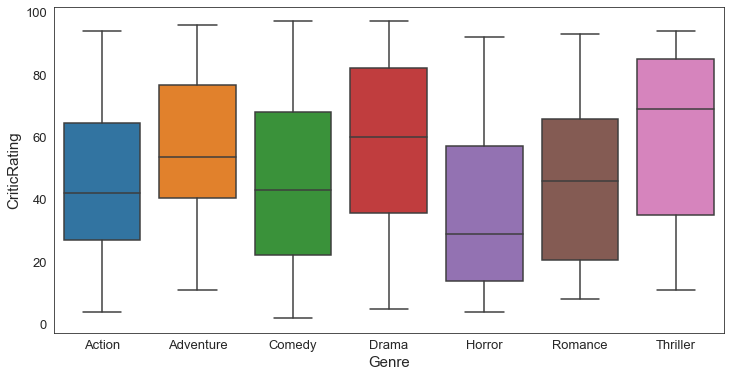

In [310]:
sns.set_style("white")

CriticRatingBoxPlot = sns.boxplot(data = MoviesDF, x = 'Genre', y = 'CriticRating' )

#Specifying the sizes of the axis labels
axes = plt.gca()
axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15)

#Specifying the sizes of the axis values
plt.xticks(fontsize = 13)               
plt.yticks(fontsize = 13)

plt.show()

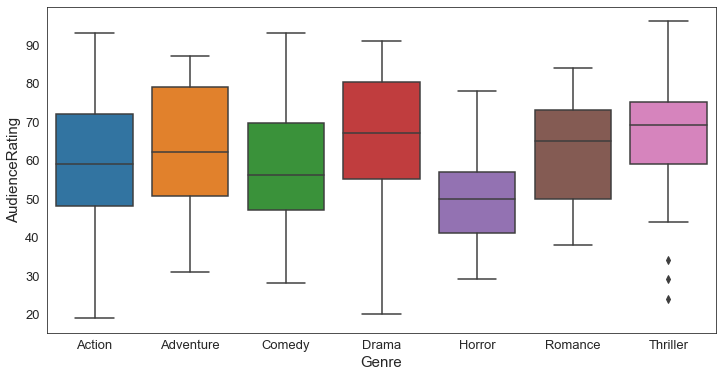

In [311]:
sns.set_style("white")

AudienceRatingBoxPlot = sns.boxplot(data = MoviesDF, x = 'Genre', y = 'AudienceRating' )

#Specifying the sizes of the axis labels
axes = plt.gca()
axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15)

#Specifying the sizes of the axis values
plt.xticks(fontsize = 13)               
plt.yticks(fontsize = 13)

plt.show()

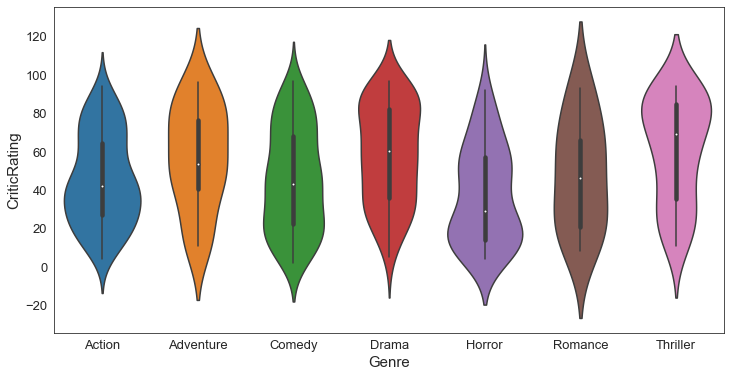

In [312]:
sns.set_style("white")

CriticRatingViolinPlot = sns.violinplot(data = MoviesDF, x = 'Genre', y = 'CriticRating' )

#Specifying the sizes of the axis labels
axes = plt.gca()
axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15)

#Specifying the sizes of the axis values
plt.xticks(fontsize = 13)               
plt.yticks(fontsize = 13)

plt.show()

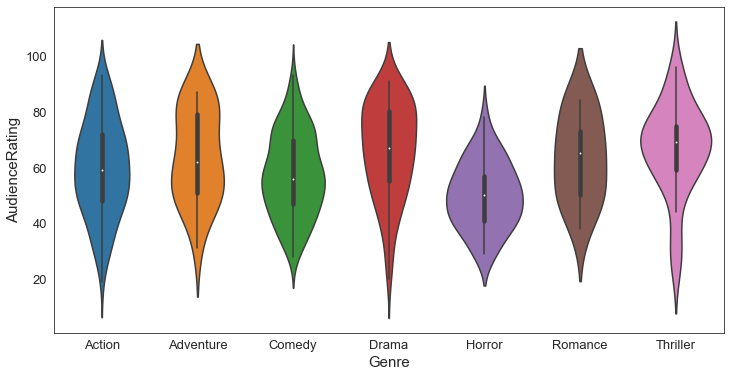

In [313]:
sns.set_style("white")

AudienceRatingViolinPlot = sns.violinplot(data = MoviesDF, x = 'Genre', y = 'AudienceRating' )

#Specifying the sizes of the axis labels
axes = plt.gca()
axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15)

#Specifying the sizes of the axis values
plt.xticks(fontsize = 13)               
plt.yticks(fontsize = 13)

plt.show()

## Dashboard (Putting it all together)

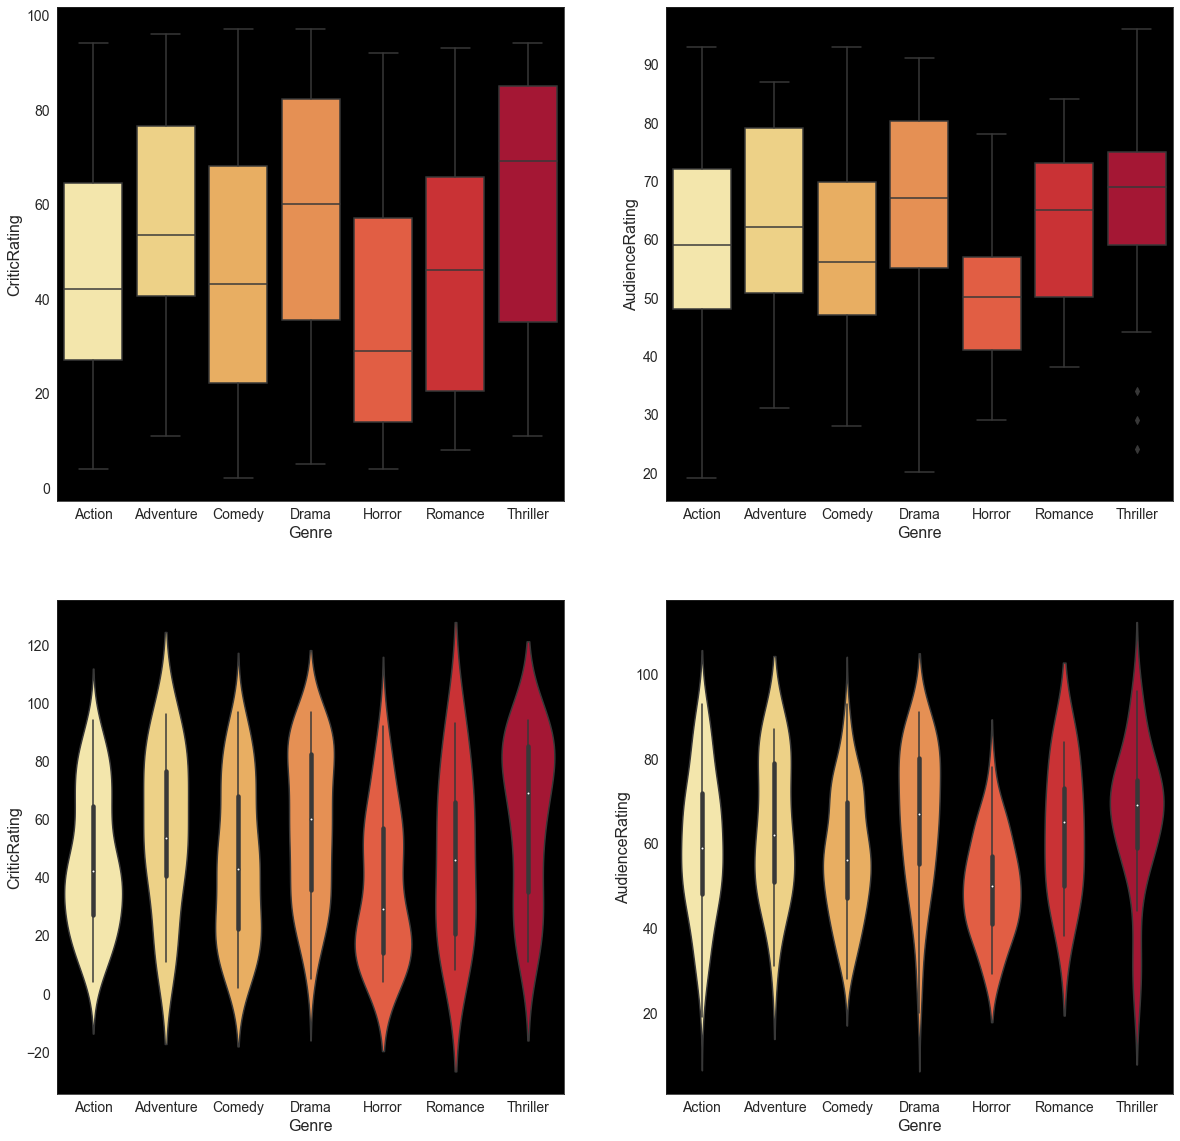

In [314]:
sns.set_style("white", {"axes.facecolor": "Black"})           #changing the bg to black
f, axis = plt.subplots(2, 2, figsize = (20, 20))              #Creating a 2x2 plot with 4 sub-plots
#'axis' above is an array object 

#Plot [0,0]
CriticRatingBoxPlot = sns.boxplot(data = MoviesDF, x = 'Genre', y = 'CriticRating', ax = axis[0][0], palette = 'YlOrRd')
axis[0][0].xaxis.get_label().set_fontsize(16)
axis[0][0].yaxis.get_label().set_fontsize(16)
#axis[0][0].set_xlabel('Genre', fontsize = 15)        Another way to set axis label size.

axis[0][0].tick_params(axis='both', labelsize=14)

#Plot [0,1]
AudienceRatingBoxPlot = sns.boxplot(data = MoviesDF, x = 'Genre', y = 'AudienceRating', ax = axis[0][1], palette = 'YlOrRd')
axis[0][1].xaxis.get_label().set_fontsize(16)
axis[0][1].yaxis.get_label().set_fontsize(16)

axis[0][1].tick_params(axis='both', labelsize=14)

#Plot [1,0]
CriticRatingViolinPlot = sns.violinplot(data = MoviesDF, x = 'Genre', y = 'CriticRating', ax = axis[1][0], palette = 'YlOrRd')
axis[1][0].xaxis.get_label().set_fontsize(16)
axis[1][0].yaxis.get_label().set_fontsize(16)

axis[1][0].tick_params(axis='both', labelsize=14)

#Plot [1,1]
AudienceRatingViolinPlot = sns.violinplot(data = MoviesDF, x = 'Genre', y = 'AudienceRating', ax = axis[1][1], palette = 'YlOrRd')
axis[1][1].xaxis.get_label().set_fontsize(16)
axis[1][1].yaxis.get_label().set_fontsize(16)

axis[1][1].tick_params(axis='both', labelsize=14)

#axis[1][1].set_xticklabels(MoviesDF.Genre.cat.categories, fontsize=14)             Another way to set axis ticks size.

plt.show()

### Insights:

In [315]:
#Movies of the Thriller genre are the most well-received movies by Critics, followed by Drama movies.
#Movies of the Thriller genre are the most well-received movies by Audience, but very closely followed by Drama and Romance 
#movies.

#Horror movies are the least well-received movies by Critics.
#As is the case with Critics, Horror movies are the least well-received movies by Audience as well.

---

## Most profitable Genres :-

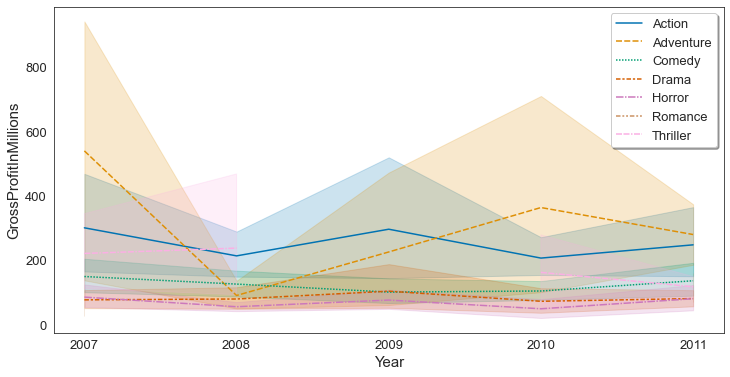

In [317]:
sns.set_style("white")
sns.lineplot(data=MoviesDF, x="Year", y="GrossProfitInMillions", hue="Genre", style = 'Genre', palette = 'colorblind')

#Specifying the sizes of the axis values
plt.xticks(fontsize = 13)               
plt.yticks(fontsize = 13)

#Specifying the legend details
plt.legend(fancybox = True, shadow = True, frameon = True, framealpha = 1, prop = {'size' : 13}) 

#Specifying the sizes of the axis labels
axes = plt.gca()
axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15)

#Specifyiing the values for X-axis
plt.xticks([2007, 2008, 2009, 2010, 2011])

plt.show()

### Insight:

In [137]:
#Action and Adventure movies are the most profitable genres.

---

## Miscellaneous Bubble Plots :-

In [320]:
BudgetAndGrossBubble = px.scatter(MoviesDF, x="BudgetInMillions", y="GrossProfitInMillions", size="ReceptionScore", 
                 color="ReceptionScore", log_x=False, hover_name="Film")
BudgetAndGrossBubble.show()

### Insights:

In [321]:
#There is some positive relationship between Budget and Gross Profit. 

#As the budget increases, so does the relative profit.

#Hovering over the highest point gives us ‘Avatar’: the most profitable movie in this dataset. The 2009 movie grossed almost 
#2850 millions compared to a budget of just 237 millions.

---

In [322]:
RuntimeAndGrossBubble = px.scatter(MoviesDF, x="Runtime", y="GrossProfitInMillions", size="Runtime",
                 log_x=False, hover_name="Film")
RuntimeAndGrossBubble.show()

### Insight:

In [562]:
#Runtime does not seem to have any significant impact on profit.

---

In [323]:
GenreAndReceptionScoreBubble = px.scatter(MoviesDF, x="Genre", y="ROI", size="ReceptionScore", color = 'ReceptionScore',
                 log_x=False, hover_name="Film")
GenreAndReceptionScoreBubble.show()

### Insights:

In [239]:
#Out of all the genres, Comedy and Drama movies have the best ROI on the budget.

#Horror movies though have a decent ROI despite their below-average Reception Score and the movie with the highest ROI in the 
#dataset also falls in the Horror genre: "Paranormal Activity".

---

In [324]:
GenreAndRuntimeBubble = px.scatter(MoviesDF, x="Genre", y="Runtime", size="ReceptionScore", color = "ReceptionScore",
                 log_x=False, hover_name="Film")
GenreAndRuntimeBubble.show()

### Insights:

In [325]:
#Horror and Romance movies are particularly short in duration, with most of the movies NOT crossing the 120-minute runtime mark.
#Reception for these movies has been mostly average or below-average (for Horror movies) irrespective of their runtime.

#Comedy, Thriller and Adventure movies are similar to Horror and Romance movies in runtime with some outliers.
#Movies in these genres (except Comedy) with relatively large runtime have been well-received.

#Drama movies have been uniformly spread over the 90-to-150 minute mark. Movies over the 120-minute runtime mark have
#generally been well-recieved with a very few exceptions.

#Action movies have been uniformly spread over the entire runtime mark. Their reception has also been consistent throughout. 

---

In [326]:
ContentRatingAndROIBubble = px.scatter(MoviesDF, x="ContentRating", y="ROI", size="ReceptionScore", color = "ReceptionScore",
                 log_x=False, hover_name="Film")
ContentRatingAndROIBubble.show()

### Insights:

In [327]:
#Nothing concrete can be said about G and NC-17 movies due to inadequate data.

#Out of the other 3 genres, PG-13 Rated movies seem to have the best ROI followed by R-rated movies and then PG movies.
#When combined with the Reception score though, R-rated movies seem to perform the best.


---

## Critic and Audience Rating comparison (per genre per year) :-

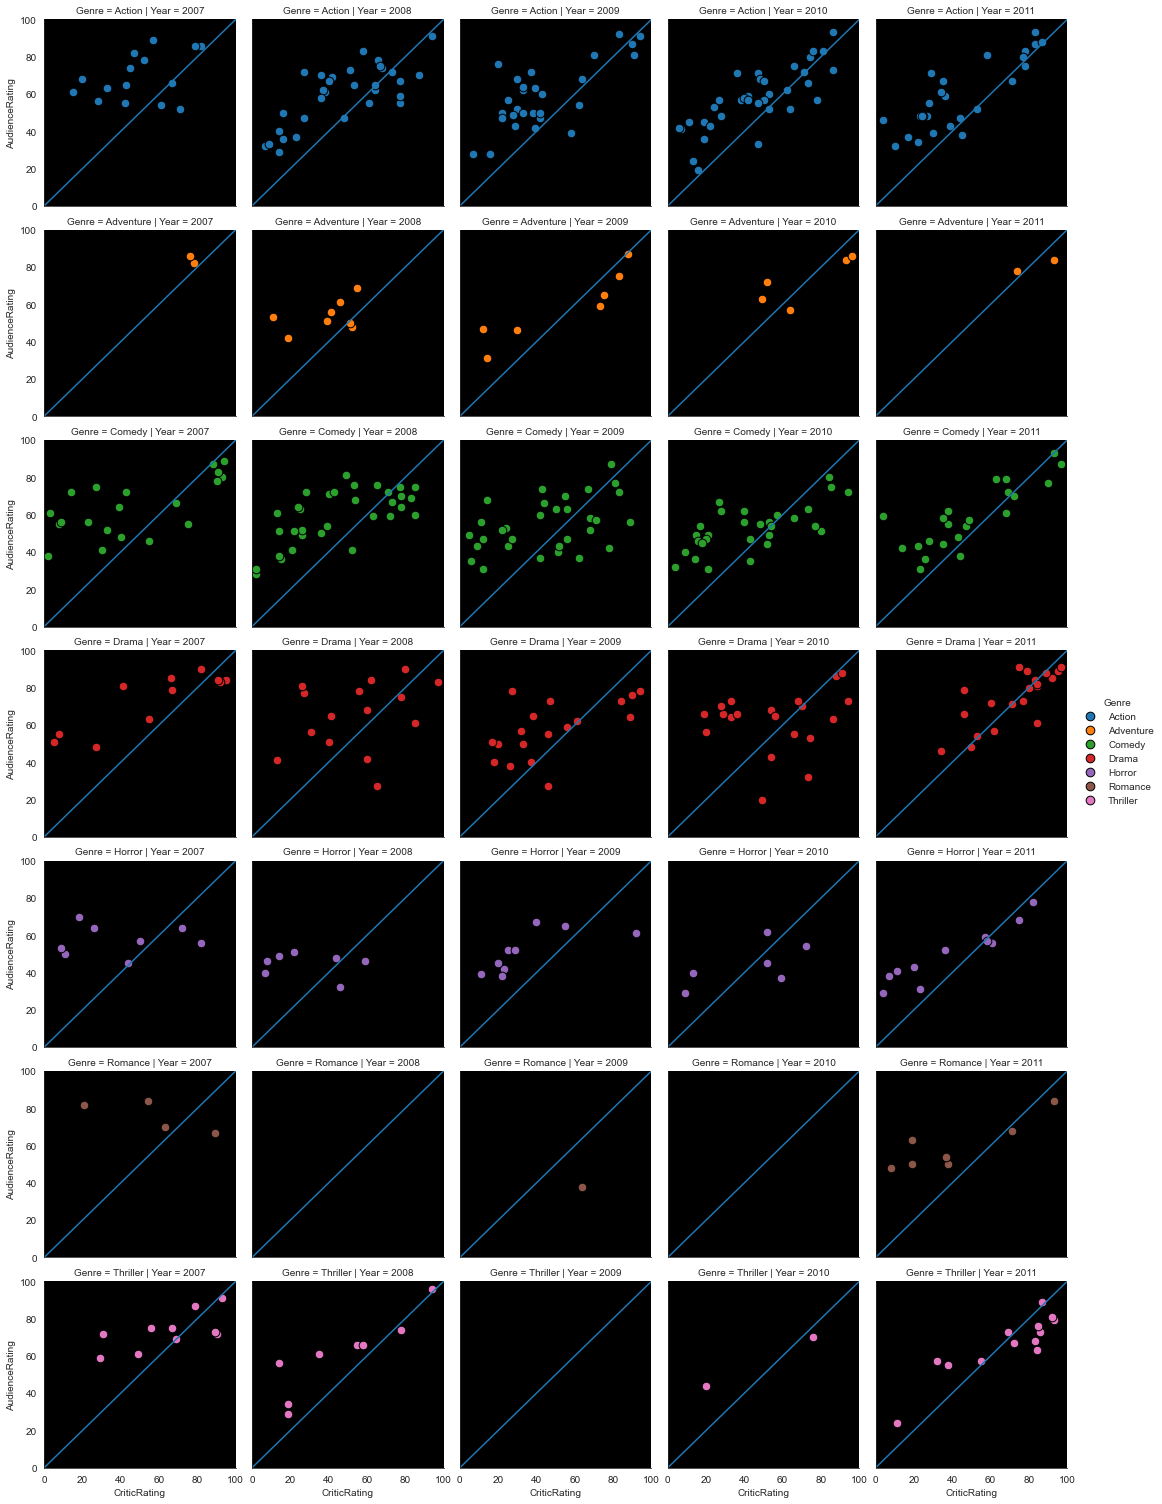

In [328]:
sns.set_style({"axes.facecolor": "Black"})           #changing the bg to black

GenreRatingYearFG = sns.FacetGrid(MoviesDF, row = 'Genre', col = 'Year', hue = 'Genre')
#Creating a facet grid for Genre-wise data per each year.

kws = dict(s = 75, linewidth = 1.0, edgecolor = 'black')       #Creating an auxiliary dictionary variable kws.
#kws stores the properties of a bubble.

GenreRatingYearFG.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

GenreRatingYearFG.set(xlim = (0,100), ylim = (0, 100))        #Setting the axes limits.

for ax in GenreRatingYearFG.axes.flat:               #Helps the ax variable to iterate over each chart in the facet grid
    ax.plot((0,100), (0,100))
    
GenreRatingYearFG.add_legend()                       #Adding a suitable legend

plt.show()

### Insights:

In [329]:
#As it can be seen on the chart, since more points are above the diagonal, the Audience have been more lenient in reviews
#than the critics for almost all the genres for any given year.

---

## Budget Distribution :-

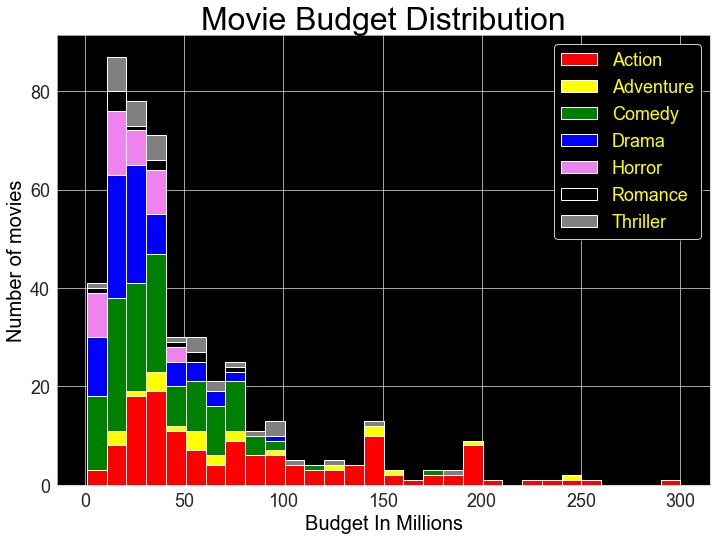

In [330]:
ListGenre = []
Labels = []
for genre in MoviesDF.Genre.cat.categories:
    ListGenre.append(MoviesDF[MoviesDF['Genre'] == genre].BudgetInMillions)
    Labels.append(genre)
    
sns.set_style("whitegrid", {"axes.facecolor": "Black"})

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)                    #Size of standard A-4 paper

plt.title("Movie Budget Distribution", fontsize = 32, color = "Black", fontname = "Arial")

plt.ylabel("Number of movies", fontsize = 20, color = "Black")
plt.xlabel("Budget In Millions", fontsize = 20, color = "Black")

plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)

plt.hist(ListGenre, bins =30, stacked = True, label = Labels,
        color = ["Red", 'Yellow', 'Green', 'Blue', 'Violet', 'Black', 'Grey'])
#Colours need to be passed in a list.
plt.legend(fancybox = True, shadow = True, frameon = True, framealpha = 1, prop = {'size' : 18}, labelcolor='yellow') 
plt.show()

### Insights:

In [152]:
#Most of the movies have their budget < 50 Million.

#Action movies are particularly high-budgeted.

#Horror movies are relatively the ones with the least budget.

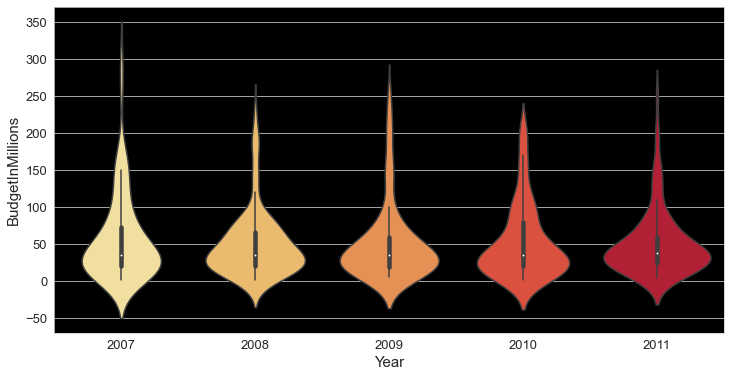

In [331]:
sns.set_style("whitegrid", {"axes.facecolor": "Black"})

YearAndBudgetViolinPlot = sns.violinplot(data = MoviesDF, x = 'Year', y = 'BudgetInMillions', palette = 'YlOrRd')

#Specifying the sizes of the axis values
plt.xticks(fontsize = 13)               
plt.yticks(fontsize = 13)

#Specifying the sizes of the axis labels
axes = plt.gca()
axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15)

### Insights:

In [154]:
#The average movie budget is going upwards very slightly per year.

#Over the years, the movie budget distribution has become more normal, with more movies falling in the 25-million budget mark.

#The most expensive movie in the dataset was released in the year 2007.